In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
G3_colour = "#6DA9E4"
G2_colour = "#F7D060"
G1_colour = "#917FB3"
GR_colour = "#98D8AA"
ECD_colour = "#FF6D60"

In [46]:
c23 = pd.read_csv("2023 - Childrens Database - Temp.csv")
c22 = pd.read_csv("2022 - Children's Results.csv")
c21_nov = pd.read_csv("2021 Nov Scores - Access Upload.csv")
c21_jan = pd.read_csv("2021 Jan Scores - Access Upload.csv")
c20_nov = pd.read_csv("2020 Nov Scores - Access Upload.csv")
c20_jan = pd.read_csv("2020 Jan Scores - Access Upload.csv")
c19_jan = pd.read_csv("2019 Jan Scores - Access Upload.csv")
ever = pd.read_csv("On Programme (2019 - 2022).csv")

In [47]:
# Assuming c22 and c21 are existing dataframes

# Perform the merge on 'Mcode' with a left join
merged_df = c22.merge(c21_nov[['Mcode', 'Nov - Total']], on='Mcode', how='left')

# Rename the 'Nov - Total' column from c21 to 'Nov 21 - Total'
merged_df.rename(columns={'Nov - Total': 'Nov 21 - Total'}, inplace=True)

# Update the c22 dataframe with the merged data
c22 = merged_df


In [48]:
c22.columns

Index(['Mcode', 'Schools', 'Centre Type', 'Class', 'Teacher', 'Grade', 'Hub',
       'Surname & Name', 'True Zero Check', 'Ever On Programme',
       'On The Programme', 'On The Programme EOY', 'Pairing Number', 'LC Name',
       'Start Date', 'Total Sessions', 'Jan - Pencil handling',
       'Jan - Picture', 'Jan - Name', 'Jan - Sounds First Letter',
       'Jan - Phonics', 'Jan - Blending', 'Jan - Sight Words',
       'Jan - CVCs Written', 'Jan - Written Words', 'Jan - Sounds Full Word',
       'Jan - Letters Correct', 'Jan - Sentence 1', 'Jan - Sentence 2',
       'Jan - Writing a Story', 'Jan - Total', 'Jan - Total Score %',
       'Jun - Pencil handling', 'Jun - Picture', 'Jun - Name',
       'Jun - Sounds First Letter', 'Jun - Phonics', 'Jun - Blending',
       'Jun - Sight Words', 'Jun - CVCs Written', 'Jun - Written Words',
       'Jun - Sounds Full Word', 'Jun -  Letters Correct (8/29pts)',
       'Jun - Sentence 1', 'Jun - Sentence 2', 'Jun - Writing a Story',
       'Jun - T

In [49]:
# Create a dictionary from the c21 dataframe with 'Mcode' as keys and 'Nov - Total' as values
lookup_dict = c21_nov.set_index('Mcode')['Nov - Total'].to_dict()

# Use the map function to create the new column 'Nov 21 - Total' in c22
c22['Nov 21 - Total'] = c22['Mcode'].map(lookup_dict)


In [50]:
# Create a dictionary from the c21 dataframe with 'Mcode' as keys and 'Nov - Total' as values
lookup_dict = c21_jan.set_index('Mcode')['Jan - Total'].to_dict()

# Use the map function to create the new column 'Nov 21 - Total' in c22
c22['Jan 21 - Total'] = c22['Mcode'].map(lookup_dict)

In [51]:
# Create a dictionary from the c21 dataframe with 'Mcode' as keys and 'Nov - Total' as values
lookup_dict = c20_jan.set_index('Mcode')['Jan - Total'].to_dict()

# Use the map function to create the new column 'Nov 21 - Total' in c22
c22['Jan 20 - Total'] = c22['Mcode'].map(lookup_dict)

In [52]:
all_3yrs = c22['Nov - Total_x'].notna() & c22['Jan 21 - Total'].notna() & c22['Jan 20 - Total'].notna()
all_3 = c22[all_3yrs]

In [53]:
all_3["Improvement_3yrs"] = all_3['Nov - Total_x'] - all_3['Jan 20 - Total']

C:\Users\jim\AppData\Local\Temp\ipykernel_19812\3885359560.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  all_3["Improvement_3yrs"] = all_3['Nov - Total_x'] - all_3['Jan 20 - Total']


In [58]:
gbo3 = all_3.groupby(['Schools','Ever On Programme'])


# On the Programme 3 years

<AxesSubplot:xlabel='Schools,Ever On Programme'>

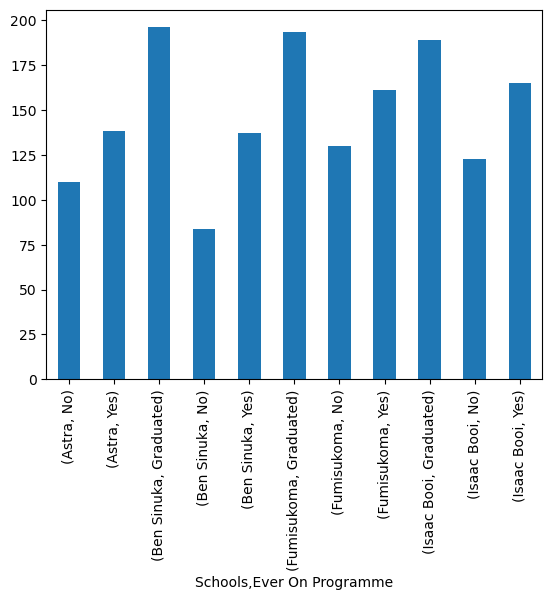

In [60]:
gbo3["Improvement_3yrs"].mean().plot(kind="bar")